In [1]:
from dataset import *
from dataloader import *
import matplotlib.pyplot as plt
import numpy as np
import torch
from utils import *

# Graphs
These graphs are plotted to show the distribution of images among classes.

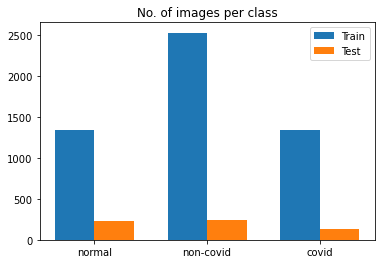

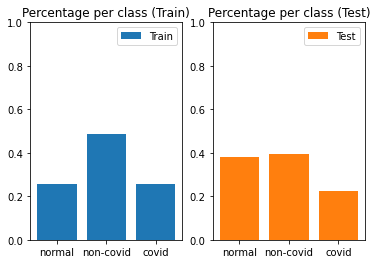

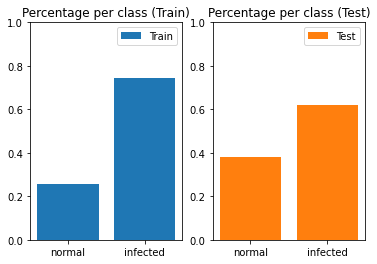

In [2]:
plot_class_distribution()

As seen from the bottom two graphs, the distribution of images among classes is different for the train and test set.

For the train set, there is much more infected (non-covid) images than normal or infected (covid) images, thus the train dataset is not very balanced. As a result, the model may be more biased toward predicting infected and non-covid.

For the test set, there is much less infected (covid) images than normal or infected (non-covid) images. The percentage of normal cases are higher than in the train set, and some normal cases may be predicted as infected and non-covid.

# Data Preparation

The methods described below are applied to all the samples in the train, val and test set.

1. Normalization

The pixel values of an image range between 0 and 255, which is very large. Normalization ensures that this range is between 0 and 1, which is smaller. When the normalized values are being fed as inputs to the neural network, it ensures that the outputs are more uniform across the neurons, thereby speeding up learning and leading to faster convergence.

2. Resizing

The image size given in the train set is already (150, 150). However, we still implemented the resize function during the preprocessing step as the test images from external sources (for the bonus component) may not be of the same required image dimensions.

# Data Augmentation
Transforms include random brightness, contrast, saturation and hue, as well as small rotations. It is only applied to the train set.

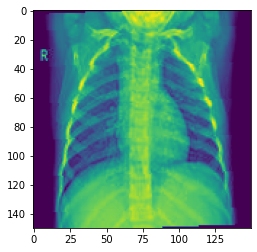

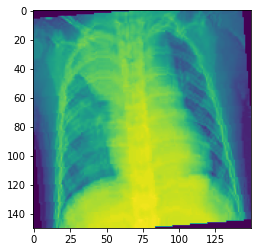

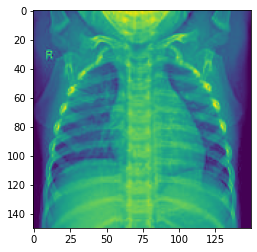

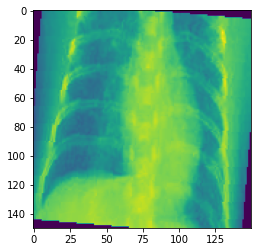

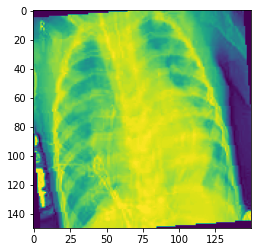

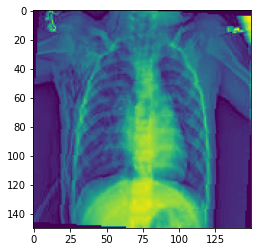

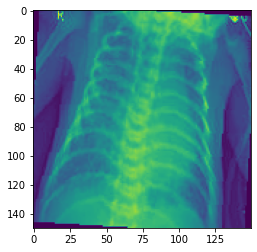

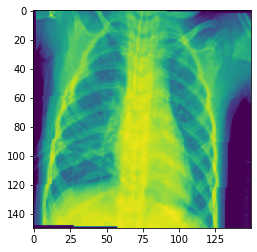

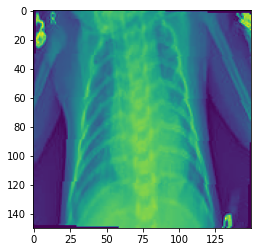

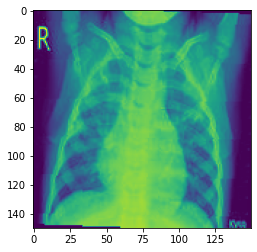

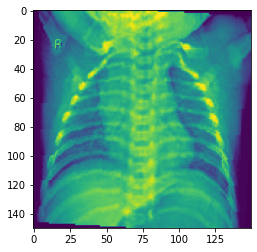

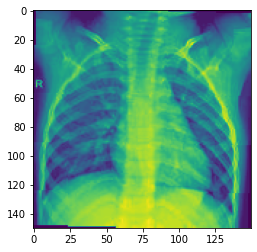

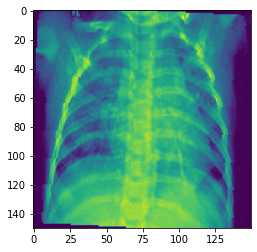

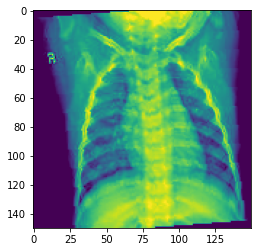

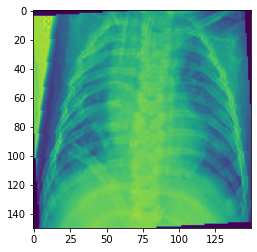

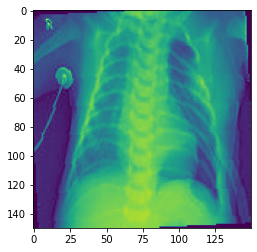

In [3]:
ld_train = load_train(Lung_Train_Dataset_BC1(), 16)

device = torch.device('cpu')

for _, (data, target) in enumerate(ld_train):
        data, target = data.to(device), target.to(device)
        for img in data:
            plt.figure()
            plt.imshow(img.squeeze(0))
        break